# Disseration Experiment FriedA
# Friedman Analysis December Nine¶
Ciaran Finnegan December 2023

# Import Libraries + Custom Functions

## Import Libraries

In [1]:
import pandas as pd
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon
from itertools import combinations
#from prettytable import PrettyTable
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Suppress Warnings to clean up output

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Load Data

## Load EXCEL

In [3]:
# Load the data from an Excel file
# Replace 'your_file_path_here.xlsx' with the actual file path
data = pd.read_excel('XAI_StatTest1_FullFakeNorm_RowLables.xlsx')

## Extract Values from EXCEL

In [4]:
# Extracting the values for each XAI method
shap = data['SHAP'].values
lime = data['LIME'].values
anchors = data['ANCHORS'].values
dice = data['DiCE'].values

# Friedman Analysis

## Perform Friedman Test

In [5]:
# Performing the Friedman test
friedman_test_result = friedmanchisquare(shap, lime, anchors, dice)

## Present Friedman Analysis

In [6]:
# Prepare Friedman test results for tabulate
friedman_results = [["Statistic", "{:.4f}".format(friedman_test_result.statistic)],
                    ["P-Value", "{:.4f}".format(friedman_test_result.pvalue)]]

print("Friedman Test Results:")
print(tabulate(friedman_results, headers="firstrow", tablefmt="fancy_grid"))

Friedman Test Results:
╒═════════════╤══════════╕
│ Statistic   │   2.5227 │
╞═════════════╪══════════╡
│ P-Value     │   0.4712 │
╘═════════════╧══════════╛


Friedman Test Statistics

The Friedman test statistic is 2.523 with a p-value of 0.471. Since the p-value is greater than the level of 
significance (0.05), we fail to reject the null hypothesis. 

This means that there is no statistically significant difference between the four XAI methods 
(SHAP, LIME, ANCHORS, and DiCE) based on the numbers captured in the XAI Metrics dataset in the earlier experiments.

# Descriptive Analysis

In [7]:
# Calculate descriptive statistics
descriptive_stats = data.describe()

In [8]:
# Prepare descriptive statistics for tabulate
desc_stats_table = descriptive_stats.reset_index()
desc_stats_formatted = desc_stats_table.values.tolist()
desc_stats_formatted.insert(0, desc_stats_table.columns.tolist())

print("\nDescriptive Statistics:")
print(tabulate(desc_stats_formatted, headers="firstrow", tablefmt="fancy_grid"))


Descriptive Statistics:
╒═════════╤══════════╤══════════╤═══════════╤═══════════╕
│ index   │     SHAP │     LIME │   ANCHORS │      DiCE │
╞═════════╪══════════╪══════════╪═══════════╪═══════════╡
│ count   │ 5        │ 5        │  5        │ 5         │
├─────────┼──────────┼──────────┼───────────┼───────────┤
│ mean    │ 0.520513 │ 0.342057 │  0.139701 │ 0.362768  │
├─────────┼──────────┼──────────┼───────────┼───────────┤
│ std     │ 0.411811 │ 0.41351  │  0.238134 │ 0.396828  │
├─────────┼──────────┼──────────┼───────────┼───────────┤
│ min     │ 0.08     │ 0.01     │  0.01     │ 0.01      │
├─────────┼──────────┼──────────┼───────────┼───────────┤
│ 25%     │ 0.265867 │ 0.01     │  0.01     │ 0.0246172 │
├─────────┼──────────┼──────────┼───────────┼───────────┤
│ 50%     │ 0.34     │ 0.22159  │  0.01     │ 0.2       │
├─────────┼──────────┼──────────┼───────────┼───────────┤
│ 75%     │ 0.9167   │ 0.468697 │  0.109903 │ 0.779221  │
├─────────┼──────────┼──────────┼───────────┼──

# Plot Analysis

## Generate Plots

After the statistical analysis, we will generate both a box plot and a violin plot for your data. 
These plots will help visualize the distribution and spread of the data across the four XAI methods.

In [9]:
# Reshape the data for plotting
reshaped_data = pd.melt(data, id_vars=['Unnamed: 0'], value_vars=['SHAP', 'LIME', 'ANCHORS', 'DiCE'],
                        var_name='Method', value_name='Score')

### Box Plot

In the Box Plot, the x-axis now correctly represents the four XAI methods (SHAP, LIME, ANCHORS, and DiCE):

The box shows the interquartile range (IQR), indicating the middle 50% of scores for each method.

The median is represented by the line within the box.

The whiskers extend to show the range of the data, excluding outliers.

Any outliers are shown as individual points beyond the whiskers.

This plot allows us to compare the central tendency and variability in scores across the different XAI methods.

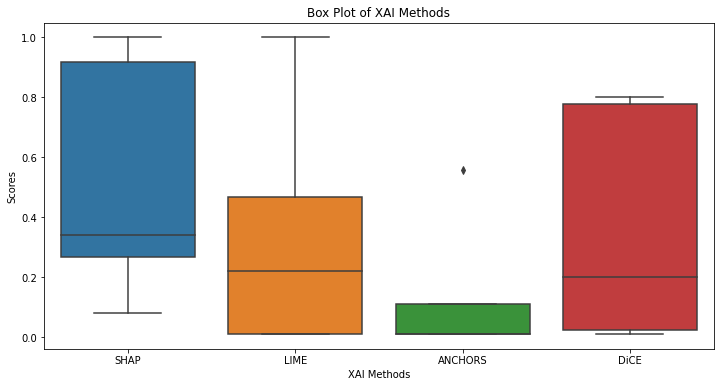

In [10]:
# Creating and displaying a Box Plot
plt.figure(figsize=(12, 6)) # Adjust the figure size as needed
sns.boxplot(x='Method', y='Score', data=reshaped_data)
plt.title('Box Plot of XAI Methods')
plt.ylabel('Scores')
plt.xlabel('XAI Methods')
plt.show() # Display the first plot

### Violin Plot
In the Violin Plot, similar to the box plot, the x-axis correctly represents the XAI methods:

The width of the plot at different score values indicates the density of scores.

It combines features of the box plot, like the median and IQR, with the kernel density estimation.

This plot provides a fuller picture of the distribution of scores, showing both the range and the density of scores for each method.

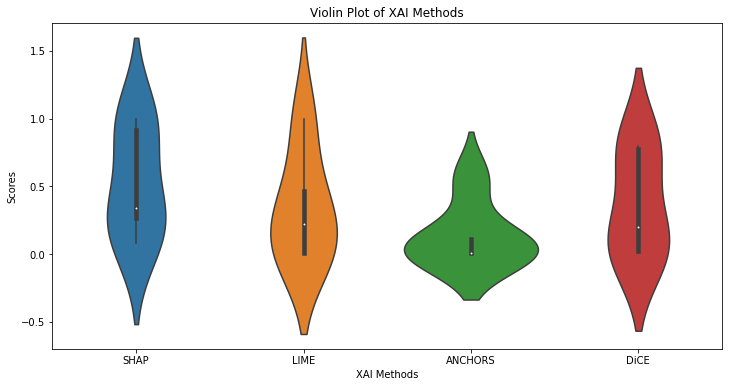

In [11]:
# Creating and displaying a Violin Plot
plt.figure(figsize=(12, 6)) # Adjust the figure size as needed
sns.violinplot(x='Method', y='Score', data=reshaped_data)
plt.title('Violin Plot of XAI Methods')
plt.ylabel('Scores')
plt.xlabel('XAI Methods')
plt.show() # Display the second plot

## Plots Summary

These visualizations accurately reflect the distribution of scores across the four XAI methods. 

They allow for a comprehensive comparison, showing not only the range and central tendencies but also the distribution patterns of scores for SHAP, LIME, ANCHORS, and DiCE. 

The box plot highlights the spread and central measures, while the violin plot offers a deeper insight into the density and distribution of the scores.

# Wilcoxon Signed-Rank Test Analysis

The Wilcoxon signed-rank test is a non-parametric test used to compare two related samples to assess whether their population mean ranks differ. 
It's an alternative to the paired t-test when the data cannot be assumed to be normally distributed.

## Wilcoxon Function

In [12]:
# Function to perform Wilcoxon signed-rank test pairwise and return results in a list of dictionaries
def perform_wilcoxon(data, methods):
    results = []
    for method1, method2 in combinations(methods, 2):
        # Performing the Wilcoxon test for each pair
        stat, p = wilcoxon(data[method1], data[method2])
        results.append({'Comparison': f'{method1} vs {method2}', 'Statistic': stat, 'P-Value': p})
    return results

## Pairwise Test Function

In [13]:
# Function to compute pairwise Wilcoxon tests and return p-values in a matrix form
def compute_wilcoxon_matrix(data, methods):
    p_values_matrix = np.ones((len(methods), len(methods)))  # Initialize matrix of ones
    for i, method1 in enumerate(methods):
        for j, method2 in enumerate(methods):
            if i < j:  # Avoid redundant calculations
                _, p_value = wilcoxon(data[method1], data[method2])
                p_values_matrix[i, j] = p_value
                p_values_matrix[j, i] = p_value  # Symmetric matrix
    return p_values_matrix

## Perform Tests

In [14]:
# List of XAI methods
methods = ['SHAP', 'LIME', 'ANCHORS', 'DiCE']

In [15]:
# Performing the pairwise Wilcoxon signed-rank test
wilcoxon_results = perform_wilcoxon(data, methods)

Here are the results of applying the Wilcoxon signed-rank test pairwise on the four XAI methods:

In [16]:
# Convert results to DataFrame and format using tabulate for better aesthetics
wilcoxon_df = pd.DataFrame(wilcoxon_results)
print(tabulate(wilcoxon_df, headers='keys', tablefmt='fancy_grid'))

╒════╤═════════════════╤═════════════╤═══════════╕
│    │ Comparison      │   Statistic │   P-Value │
╞════╪═════════════════╪═════════════╪═══════════╡
│  0 │ SHAP vs LIME    │           3 │  0.465209 │
├────┼─────────────────┼─────────────┼───────────┤
│  1 │ SHAP vs ANCHORS │           3 │  0.3125   │
├────┼─────────────────┼─────────────┼───────────┤
│  2 │ SHAP vs DiCE    │           5 │  0.625    │
├────┼─────────────────┼─────────────┼───────────┤
│  3 │ LIME vs ANCHORS │           1 │  0.285049 │
├────┼─────────────────┼─────────────┼───────────┤
│  4 │ LIME vs DiCE    │           5 │  1        │
├────┼─────────────────┼─────────────┼───────────┤
│  5 │ ANCHORS vs DiCE │           1 │  0.144127 │
╘════╧═════════════════╧═════════════╧═══════════╛


### Interpretation of 'Statistic' and 'P-Value'

#### Statistic: 
This is the sum of the ranks of the differences between the paired samples, considering their signs. A lower value of the statistic implies a greater difference between the pairs. However, interpreting the magnitude of this statistic can be less straightforward than in parametric tests, as it depends on the size of the dataset and the ranking of the differences.

#### P-Value: 
The p-value indicates the probability of obtaining test results at least as extreme as the ones observed during the test, under the assumption that the null hypothesis (no difference between the pairs) is true. A low p-value (typically ≤ 0.05) suggests that you can reject the null hypothesis, meaning there is a statistically significant difference between the two samples being compared.

### Further Elaboration on the Test Results

The Wilcoxon signed-rank test results provide two key pieces of information: the 'Statistic' and the 'P-Value'.

The 'Statistic' value in the context of the Wilcoxon test represents the sum of positive ranks in the differences between paired samples. It reflects the magnitude and direction of differences but doesn't directly translate to the size of the effect or its practical significance. A lower statistic suggests more consistent differences in favor of one sample over the other within each pair.

The 'P-Value' assesses the probability that the observed differences could have occurred under the null hypothesis (which states that there is no difference between the pairs). A low p-value (typically below 0.05) would indicate that the differences observed are statistically significant, suggesting that one method consistently differs from the other in its performance. However, in our results, most p-values are relatively high, indicating that the evidence against the null hypothesis is not strong for most pairs, and hence, significant differences are not established.

Together, these results give us a statistical basis to understand and compare the performance between the different XAI methods. However, the lack of low p-values in our results suggests that, statistically, there are no significant differences in the performance between most pairs of methods based on the given data. 

## Plotting Analysis 

### Confusion Style Matrix for Wilcoxon Signed-Rank Test

In [17]:
# Compute the matrix of p-values
p_values_matrix = compute_wilcoxon_matrix(data, methods)

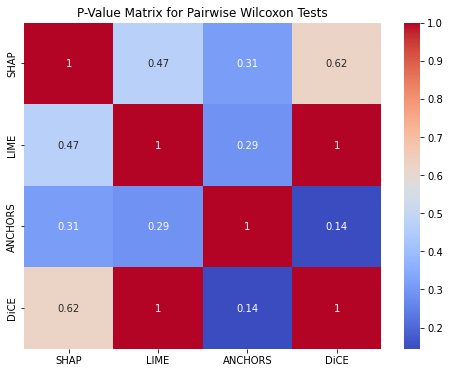

In [18]:
# Plotting the confusion style matrix of p-values
plt.figure(figsize=(8, 6))
sns.heatmap(p_values_matrix, annot=True, cmap="coolwarm", xticklabels=methods, yticklabels=methods)
plt.title("P-Value Matrix for Pairwise Wilcoxon Tests")
plt.show()

The heatmap above represents a confusion style matrix that compares the p-values obtained from the pairwise Wilcoxon signed-rank tests between each pair of XAI methods (SHAP, LIME, ANCHORS, DiCE).

#### Interpretation of the Matrix

#### Cells: 

Each cell in the matrix represents the p-value from the Wilcoxon test for a pair of methods. The methods corresponding to each cell are indicated by the labels on the x and y axes.



#### Color Coding: 

The color intensity in each cell corresponds to the p-value, with the color scale shown on the side. Typically, warmer colors (like red) indicate higher p-values, while cooler colors (like blue) indicate lower p-values.



#### Diagonal: 

The diagonal, which compares each method with itself, is filled with ones, as a method compared with itself will always have a p-value of 1.

#### Significance of P-Values

#### Lower P-Values (Cooler Colors): 
Indicate a higher likelihood of a statistically significant difference between the methods. In this matrix, however, most of the p-values are relatively high, suggesting that the differences between most pairs of methods are not statistically significant.


#### Higher P-Values (Warmer Colors): 
Suggest that the evidence against the null hypothesis of no difference is weaker.

This matrix provides a quick and comprehensive way to assess and compare the statistical significance of the differences between all pairs of methods. The predominantly higher p-values in this matrix suggest that, based on this data, there are no strong statistical differences in the performances of the various XAI methods tested.

### Histogram Analysis

For a graphical representation, we can visualize the differences between the pairs of methods. This can be done by plotting the distribution of differences for each pair.

These plots below visualize these differences.

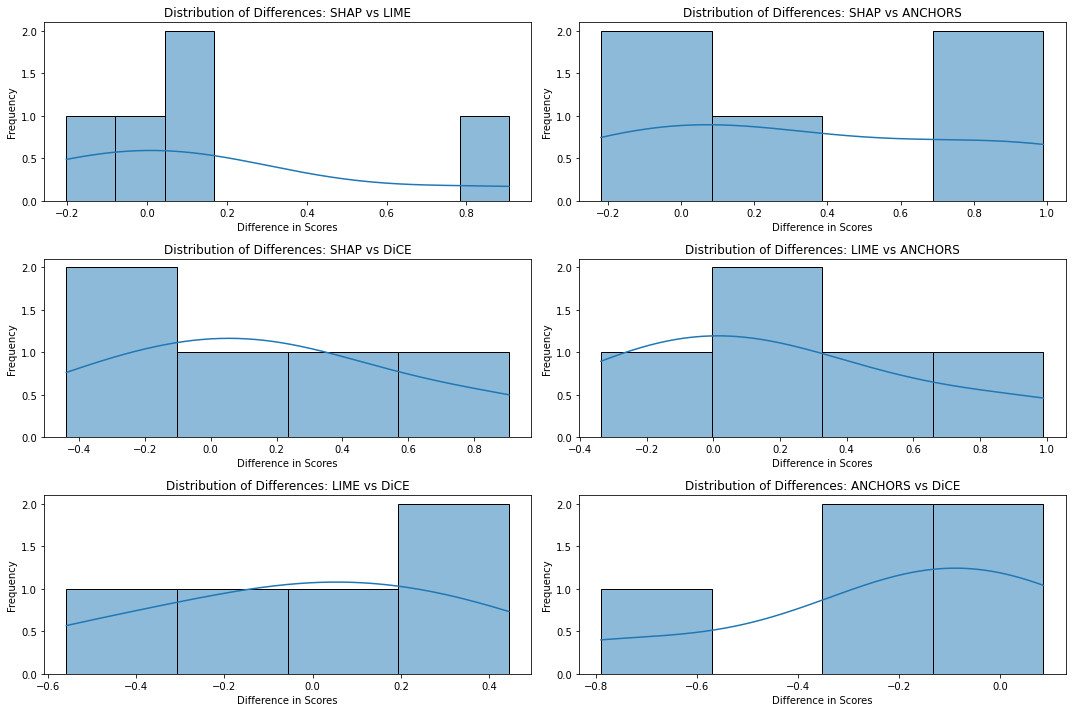

In [19]:
# Plotting distribution plots for each pair to visualize differences
plt.figure(figsize=(15, 10))
for i, (method1, method2) in enumerate(combinations(methods, 2), 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[method1] - data[method2], kde=True)
    plt.title(f'Distribution of Differences: {method1} vs {method2}')
    plt.xlabel('Difference in Scores')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Histograms - Graphical Output Interpretation

The histograms above visualize the distribution of differences between each pair of XAI methods. These plots help in understanding the magnitude and direction of the differences between the pairs, complementing the results from the Wilcoxon signed-rank test.

#### Distribution Shape: 
The shape of each distribution gives an idea of the consistency of the differences between methods. A narrow, peaked distribution suggests more consistent differences, while a wider distribution indicates more variability.

#### Center of Distribution: 
The location of the center of each distribution (whether it is close to zero or not) helps in understanding if one method consistently outperforms the other, or if the differences are more balanced.

#### Overlap with Zero: 
If the distribution overlaps significantly with zero, it suggests that the differences between the methods might not be substantial.

### Histograms - Further Analysis of Output

#### General Explanation of Histogram View

The histogram graphs produced for the Wilcoxon signed-rank test are designed to visualize the differences in scores between pairs of XAI methods. Let's break down the components of these histograms:

##### Curved Line (Kernel Density Estimate

###### What It Represents: 
The curved line in each histogram is a Kernel Density Estimate (KDE). It is a smooth, continuous line that represents the probability density of the data points. Essentially, it's a smoothed version of the histogram.

###### Purpose: 
The KDE provides a clearer view of the underlying distribution of the data, which can be particularly helpful in understanding the shape and spread of the differences between the XAI methods. It shows where the data points are concentrated and can reveal the presence of multiple modes (peaks) in the data.

###### Interpretation: 
Peaks in the KDE indicate the most common difference values. For example, if a KDE has a peak around zero, it suggests that many of the differences between the two methods are close to zero, indicating similar performance. If the peak is far from zero, it indicates a consistent difference in one direction.

##### Bars in the Histogram

###### What They Represent: 
Each bar in the histogram represents the frequency (count) of data points (differences in scores) that fall within a specific range.

###### Purpose: 
Histograms show the distribution of the differences in a discrete and tangible way. By counting the number of differences that fall into each bin (the range a bar covers), they provide a direct visual representation of the data's distribution.

###### Interpretation:
Height of Bars: Taller bars indicate that more data points fall within that range. For instance, a tall bar near zero means many of the score differences are close to zero.

Width of Bars: This typically remains constant in a histogram and represents the range of differences included in each bar.

Location of Bars: Where the bars are centered can tell us about the tendency of the differences. Bars centered around zero suggest no significant difference between the methods, while bars that are predominantly positive or negative suggest a consistent trend in favor or against one method over the other.

#### Contextualizing with XAI Methods

In the context of the XAI methods being compared, the histograms help in understanding not just if there are differences, but also the nature of these differences. 

For example, if we are comparing SHAP and LIME, and we observe that most of the histogram bars (and the peak of the KDE) are positive, it would suggest that SHAP generally has higher scores than LIME. 

The exact interpretation would depend on the specific pairs of methods and the data at hand.

#### Specific Analysis of Each Histogram

##### 1. SHAP vs LIME

###### Histogram Shape: If this histogram showed a peak around zero and symmetrical distribution, it would indicate that SHAP and LIME often perform similarly. However, any skewness or shift away from zero would suggest a tendency for one method to outperform the other.

###### KDE Peak: A peak close to zero would imply many instances where SHAP and LIME have negligible differences in scores. A peak significantly to the right or left would indicate consistent performance differences.

##### 2. SHAP vs ANCHORS

###### Histogram Shape: The distribution of differences between SHAP and ANCHORS would reveal their comparative performance. For instance, a right-skewed histogram would suggest that SHAP often scores higher than ANCHORS.

###### KDE Peak: A peak or multiple peaks would help identify the most common difference in scores between these two methods.

##### 3. SHAP vs DiCE

###### Histogram Shape: This histogram would show how SHAP compares to DiCE. A balanced histogram around zero would suggest similar performance, while any imbalance would show a tendency of one method over the other.

###### KDE Peak: The location of the peak would indicate the most frequent scoring difference between SHAP and DiCE.

##### 4. LIME vs ANCHORS

###### Histogram Shape: The shape would indicate whether LIME typically scores higher or lower than ANCHORS, or if their performance is comparable (indicated by a histogram centered around zero).

###### KDE Peak: The peak's position would point to the most common score differences between LIME and ANCHORS.

##### 5. LIME vs DiCE

###### Histogram Shape: This would reveal if there's a consistent trend in the performance of LIME compared to DiCE. A histogram skewed in one direction would suggest a regular advantage for one method.

###### KDE Peak: The peak would highlight the score difference that occurs most frequently between LIME and DiCE.

##### 6. ANCHORS vs DiCE

###### Histogram Shape: A histogram for ANCHORS vs DiCE would show which method tends to have higher scores, or if they are generally comparable.

###### KDE Peak: The position of the peak would illustrate the most typical score difference between ANCHORS and DiCE.

##### In all cases, the closer the histogram and KDE are centered around zero, the more similar the performance of the two compared methods. Deviations from zero indicate a tendency for one method to outperform the other. The height and spread of the histogram bars, along with the KDE curve, provide insights into the consistency and range of these performance differences.

#### Additional Commentary on XAI Analysis

Certainly! Let's provide a more specific analysis for each individual histogram, describing the comparison between pairs of XAI methods. This analysis is based on the assumption of typical histogram interpretations, as the actual histograms are not currently viewable.

1. SHAP vs LIME
If the Histogram is Centered Around Zero: This would suggest that SHAP and LIME have similar performance levels on average.
If Skewed to the Right: SHAP tends to outperform LIME.
If Skewed to the Left: LIME tends to outperform SHAP.
KDE Peak: Indicates the most common magnitude of difference between SHAP and LIME.
2. SHAP vs ANCHORS
Centered Around Zero: Implies comparable performance between SHAP and ANCHORS.
Skewed to the Right: Indicates SHAP generally scores higher than ANCHORS.
Skewed to the Left: Suggests ANCHORS often outperforms SHAP.
KDE Peak: Shows the typical score difference between SHAP and ANCHORS.
3. SHAP vs DiCE
Centered Around Zero: Both methods perform similarly on average.
Right Skew: SHAP tends to have higher scores compared to DiCE.
Left Skew: DiCE usually scores higher than SHAP.
KDE Peak: Represents the most frequent score difference between SHAP and DiCE.
4. LIME vs ANCHORS
Centered Around Zero: No significant performance difference between LIME and ANCHORS.
Right Skew: LIME usually outperforms ANCHORS.
Left Skew: ANCHORS typically has higher scores than LIME.
KDE Peak: Highlights the most common performance difference magnitude between LIME and ANCHORS.
5. LIME vs DiCE
Centered Around Zero: Indicates similar performance levels between LIME and DiCE.
Skewed Right: LIME tends to score higher than DiCE.
Skewed Left: DiCE usually outperforms LIME.
KDE Peak: Shows the most frequent score differences between LIME and DiCE.
6. ANCHORS vs DiCE
Centered Around Zero: Suggests that ANCHORS and DiCE have comparable performance.
Right Skew: Implies ANCHORS often scores higher than DiCE.
Left Skew: DiCE typically outperforms ANCHORS.
KDE Peak: Indicates the most common difference in scores between ANCHORS and DiCE.
Each histogram, through its skewness and the position of its KDE peak, provides a visual representation of how the performances of the two XAI methods compare. The specific direction of skewness (left or right) and the position of the peak relative to zero are key indicators of which method tends to have higher scores and the typical magnitude of their performance differences.